In [3]:
!pip install fast_ml

In [6]:
!pip install opencv-python

In [45]:
!pip install keras

In [49]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\ProgramData\\Anaconda3\\Scripts\\pyrsa-encrypt.exe' -> 'C:\\ProgramData\\Anaconda3\\Scripts\\pyrsa-encrypt.exe.deleteme'
Consider using the `--user` option or check the permissions.



  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached termcolor-2.1.0-py3-none-any.whl (5.8 kB)
  Using cached grpcio-1.50.0-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached google_auth-2.14.1-py2.py3-none-any.whl (175 kB)
  Using cached Markdown-3.4.1-py3-none-any.whl (93 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB

In [197]:
# importing libraries
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.preprocessing import LabelEncoder
from skimage import color
from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [130]:
# Read dataset
Train=os.listdir("train")
Test=os.listdir("testing")
Valid=os.listdir("validation")


path_Train="train/"
path_Test="testing/"
path_Valid="validation/"

image_size=64
x_train,x_valid,x_test=[],[],[]
y_train,y_valid,y_test=[],[],[]

for i in Train:
    Tr_path=path_Train+str(i)
    file=[i for i in os.listdir(Tr_path)]
    for g in file:
        img = cv2.imread(Tr_path+'/'+g)
        x_train.append(img)
        y_train.append(i)       

In [131]:
for i in Test:
    Tes_path=path_Test+str(i)
    file=[i for i in os.listdir(Tes_path)]
    for g in file:
        img = cv2.imread(Tes_path+'/'+g)
        x_test.append(img)
        y_test.append(i) 

In [132]:
for i in Valid:
    val_path=path_Valid+str(i)
    file=[i for i in os.listdir(val_path)]
    for g in file:
        img = cv2.imread(val_path+'/'+g)
        x_valid.append(img)
        y_valid.append(i) 

In [133]:
np.array(x_valid).shape

(50, 64, 64, 3)

In [134]:
np.unique(y_train)

array(['blusher', 'brushes', 'creams', 'eyelinear', 'foundation',
       'lip gloss', 'mascara', 'nail polish', 'rouge', 'sponge'],
      dtype='<U11')

In [135]:
# convert y to label_encoder
y=y_train
print(len(y))
y_labelencoder= LabelEncoder()
y=y_labelencoder.fit_transform(y)
y

336


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

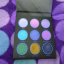

In [136]:
from PIL import Image
display(Image.fromarray(x_train[0]))

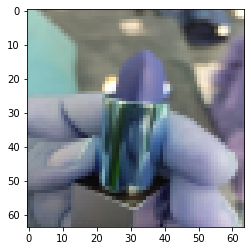

In [137]:
plt.imshow(x_train[300])

In [105]:
np.array(y_train)[1]

'blusher'

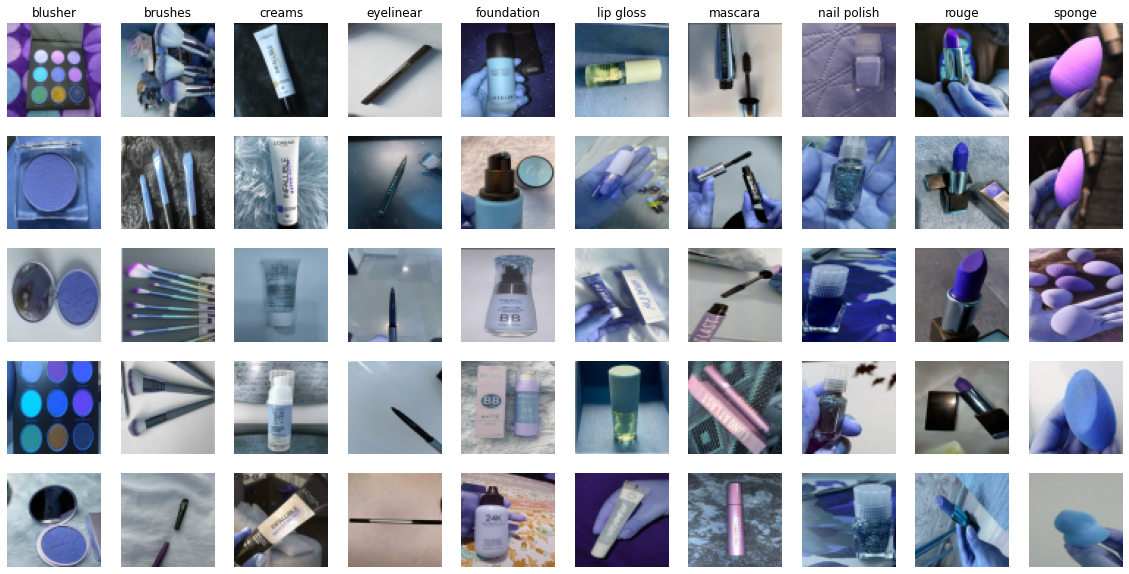

In [106]:
# Visualize five samples of each class
# using the variable axs for multiple Axes
labels = ['blusher', 'brushes', 'creams', 'eyelinear', 'foundation','lip gloss', 'mascara', 'nail polish', 'rouge', 'sponge']
fig, axs = plt.subplots(5,10, figsize=(20,10))

for i in range(10):
  row = 0
  list_class = np.where(y==i)[0][:5]
  for j in list_class:
    axs[row][i].imshow(Image.fromarray(x_train[j]))
    axs[row][i].axis("off")
    axs[0][i].set_title(labels[i])

    row+=1

Applying gray scale to images

In [107]:
Gray_Image=[]
for i in x_train:
    gray_scale_imgs=color.rgb2gray(i)
    Gray_Image.append(gray_scale_imgs)


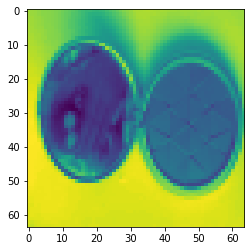

In [108]:
plt.imshow(np.array(Gray_Image[2]))

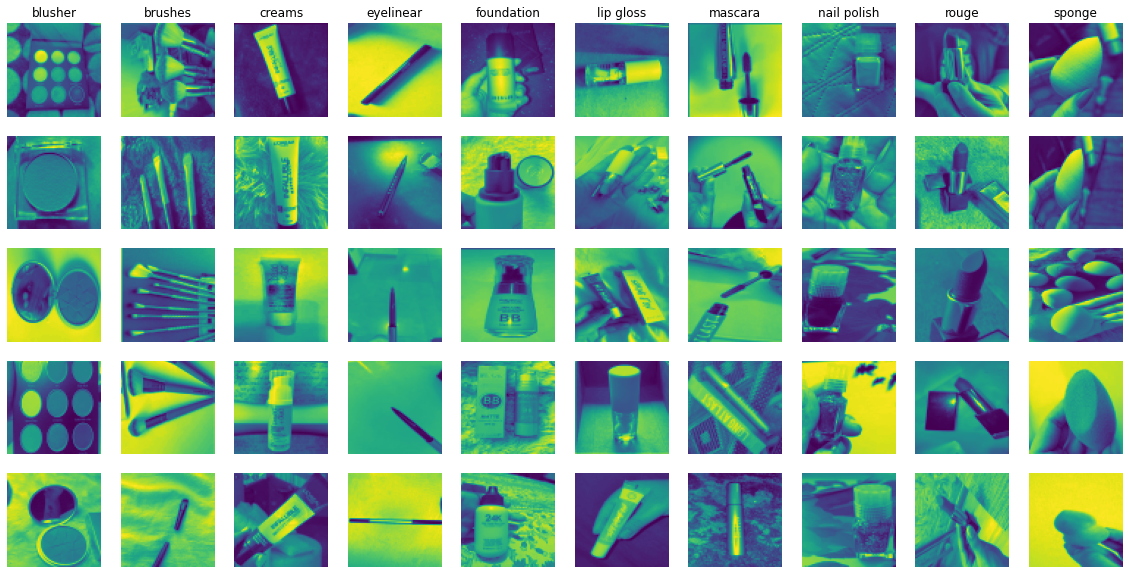

In [109]:
labels = ['blusher', 'brushes', 'creams', 'eyelinear', 'foundation','lip gloss', 'mascara', 'nail polish', 'rouge', 'sponge']
fig, axs = plt.subplots(5,10, figsize=(20,10))

for i in range(10):
  row = 0
  list_class = np.where(y==i)[0][:5]
  for j in list_class:
    axs[row][i].imshow(np.array(Gray_Image[j]))
    axs[row][i].axis("off")
    axs[0][i].set_title(labels[i])

    row+=1

Histogram of Oriented Gradients

In [110]:

from skimage.feature import hog

def ApplyHog(image):
  feature_Vector = hog(image, orientations=9, pixels_per_cell=[7,7],
              cells_per_block=[2,2],
            visualize=False, multichannel=False, block_norm="L2")
  return feature_Vector

X_HOG_Features = np.array([ApplyHog(img) for img in Gray_Image])

In [111]:
X_HOG_Features.shape

(336, 2304)

# Data Generator

In [159]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [160]:
train_generator=train_datagen.flow_from_directory(path_Train,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

val_generator=val_datagen.flow_from_directory(path_Valid,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

test_gemerator=test_datagen.flow_from_directory(path_Test,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

Found 336 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 117 images belonging to 10 classes.


# RseNet

In [161]:
from keras.applications import ResNet101V2
convlayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)


171317808/171317808 [==============================] - 119s 1us/step


In [162]:
for layer in convlayer.layers:
    layer.trainable=False

In [176]:
x1 = convlayer.output
x1 = GlobalAveragePooling2D()(x1)

In [177]:
x1 = Dense(512, activation='relu')(x1)
pred_ResNet = Dense(20, activation='softmax')(x1)

In [178]:
model_ResNet = Model(inputs = convlayer.input, outputs = pred_ResNet)

In [179]:
model_ResNet.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [170]:
model_ResNet=model_ResNet.fit(train_generator,validation_data=val_generator,
         epochs=5)

Epoch 1/5
2/2 [==============================] - 62s 41s/step - loss: 3.7366 - accuracy: 0.0506 - val_loss: 3.5284 - val_accuracy: 0.0600
Epoch 2/5
2/2 [==============================] - 51s 41s/step - loss: 3.1201 - accuracy: 0.1369 - val_loss: 3.0598 - val_accuracy: 0.1000
Epoch 3/5
2/2 [==============================] - 55s 19s/step - loss: 2.7660 - accuracy: 0.2173 - val_loss: 2.6773 - val_accuracy: 0.1400
Epoch 4/5
2/2 [==============================] - 54s 19s/step - loss: 2.3651 - accuracy: 0.3036 - val_loss: 2.3623 - val_accuracy: 0.2200
Epoch 5/5
2/2 [==============================] - 56s 19s/step - loss: 2.0342 - accuracy: 0.4048 - val_loss: 2.1047 - val_accuracy: 0.3600


In [180]:
model_ResNet.evaluate(test_gemerator)

1/1 [==============================] - 19s 19s/step - loss: 3.3586 - accuracy: 0.1026


[3.358550786972046, 0.10256410390138626]

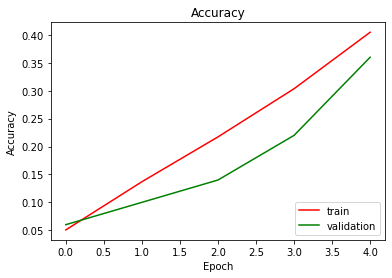

In [171]:
plt.plot(model_ResNet.history['accuracy'],c='red')
plt.plot(model_ResNet.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

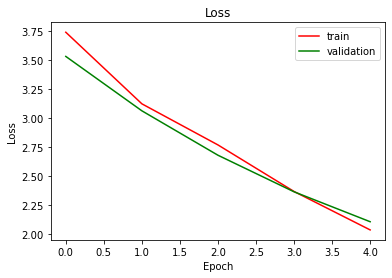

In [172]:
plt.plot(model_ResNet.history['loss'],c='red')
plt.plot(model_ResNet.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

# Inception 

In [181]:
convlayer1 = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(224,224,3))

In [182]:
x2 = convlayer1.output
x2 = GlobalAveragePooling2D()(x2)

In [183]:
x2 = Dense(512, activation='relu')(x2)
pred_Inception = Dense(20, activation='softmax')(x2)

In [184]:
model_Inception = Model(inputs = convlayer1.input, outputs = pred_Inception)

In [185]:
for layer in convlayer1.layers:
    layer.trainable = False

In [188]:
model_Inception.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [192]:
# Train the model
model_Inception1= model_Inception.fit(train_generator,validation_data=val_generator,
         epochs=5)

Epoch 1/5
2/2 [==============================] - 19s 7s/step - loss: 1.5122 - accuracy: 0.6131 - val_loss: 1.6767 - val_accuracy: 0.4200
Epoch 2/5
2/2 [==============================] - 21s 7s/step - loss: 1.3597 - accuracy: 0.6726 - val_loss: 1.5605 - val_accuracy: 0.4400
Epoch 3/5
2/2 [==============================] - 21s 7s/step - loss: 1.2325 - accuracy: 0.6994 - val_loss: 1.4644 - val_accuracy: 0.4600
Epoch 4/5
2/2 [==============================] - 21s 16s/step - loss: 1.1007 - accuracy: 0.7292 - val_loss: 1.3822 - val_accuracy: 0.5000
Epoch 5/5
2/2 [==============================] - 20s 16s/step - loss: 0.9990 - accuracy: 0.7708 - val_loss: 1.3037 - val_accuracy: 0.5000


In [193]:
model_Inception.evaluate(test_gemerator)

1/1 [==============================] - 7s 7s/step - loss: 1.4715 - accuracy: 0.4872


[1.4714581966400146, 0.4871794879436493]

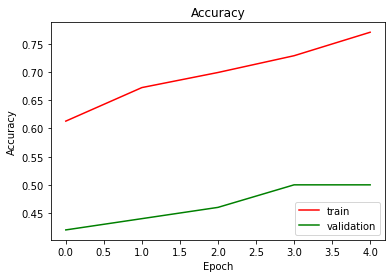

In [195]:
plt.plot(model_Inception1.history['accuracy'],c='red')
plt.plot(model_Inception1.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

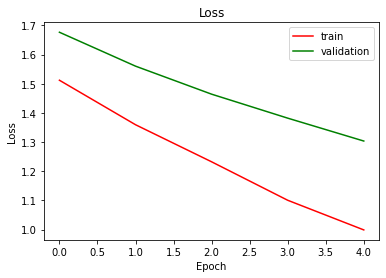

In [196]:
plt.plot(model_Inception1.history['loss'],c='red')
plt.plot(model_Inception1.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

# MobileNet

In [198]:
convlayer2 = MobileNet(weights = 'imagenet', include_top = False, input_shape=(224,224,3))

17225924/17225924 [==============================] - 10s 1us/step


In [199]:
x3 = convlayer2.output
x3 = GlobalAveragePooling2D()(x3)

In [200]:
x3 = Dense(512, activation='relu')(x3)
pred_MobileNet = Dense(20, activation='softmax')(x3)

In [202]:
model_MobileNet = Model(inputs = convlayer2.input, outputs = pred_MobileNet)

In [203]:
for layer in convlayer2.layers:
    layer.trainable = False

In [204]:
model_MobileNet.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [205]:
model_MobileNet1= model_MobileNet.fit(train_generator,validation_data=val_generator,
         epochs=5)

Epoch 1/5
2/2 [==============================] - 12s 8s/step - loss: 3.4529 - accuracy: 0.0506 - val_loss: 3.2789 - val_accuracy: 0.0800
Epoch 2/5
2/2 [==============================] - 8s 3s/step - loss: 3.1500 - accuracy: 0.0565 - val_loss: 2.9678 - val_accuracy: 0.1000
Epoch 3/5
2/2 [==============================] - 8s 3s/step - loss: 2.8253 - accuracy: 0.0923 - val_loss: 2.7291 - val_accuracy: 0.0800
Epoch 4/5
2/2 [==============================] - 8s 6s/step - loss: 2.5248 - accuracy: 0.1577 - val_loss: 2.5368 - val_accuracy: 0.1400
Epoch 5/5
2/2 [==============================] - 8s 6s/step - loss: 2.3276 - accuracy: 0.2262 - val_loss: 2.3749 - val_accuracy: 0.2400


In [206]:
model_MobileNet.evaluate(test_gemerator)

1/1 [==============================] - 3s 3s/step - loss: 2.3767 - accuracy: 0.1368


[2.3766844272613525, 0.1367521435022354]

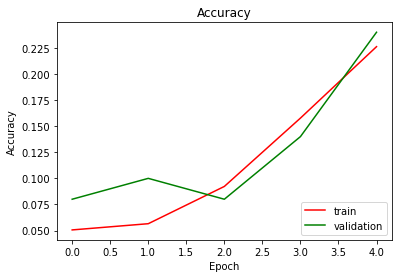

In [207]:
plt.plot(model_MobileNet1.history['accuracy'],c='red')
plt.plot(model_MobileNet1.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

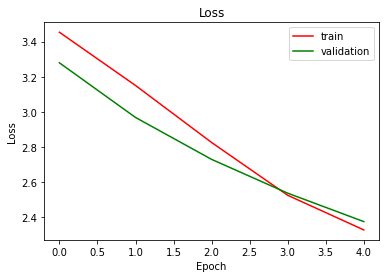

In [208]:
plt.plot(model_MobileNet1.history['loss'],c='red')
plt.plot(model_MobileNet1.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')